# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Background:**

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.
Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

**Objective:**
Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.
You are expected to perform the statistical analysis to answer the following questions:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5.	Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

**Data Dictionary:**
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
language_preferred - This represents the language chosen by the user to view the landing page


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# ensure Matplotlib to include the seaborn graph into the jupyter notebook
%matplotlib inline
#import libraries for warnings
import warnings
#ignore warnings
warnings.filterwarnings("ignore") 

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# Reading the dataset abtest.csv
c_data= pd.read_csv('abtest.csv')
# Returning the first five rows
c_data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
# Using the shape attribute to determine the number of rows and columns
c_data.shape

(100, 6)

In [4]:
#Using info() to print a concise summary of the DataFrame
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
# Checking for null values
c_data[c_data.isnull()].sum()

user_id                   0.0
group                       0
landing_page                0
time_spent_on_the_page    0.0
converted                   0
language_preferred          0
dtype: object

The dataframe shows three datatypes:

- Integer (int64)
- Float (float64)
- Object (object) (type string) The Dataframe does not contain any missing or null values as seen in the result from info().
  This is confirmed by the isnull() function.

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# Writing the code to convert 'group', 'landing page', 'converted' and 'language preferred' into categorical data.
# Passing the list of columns to be converted

c_data[['group','landing_page','converted','language_preferred']]= c_data[['group','landing_page','converted','language_preferred']].astype('category')

# Checking the dataset again to confirm conversion from string to category datatype
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Statistical Summary of the Sample

In [7]:
# The describe() method is used here to generate a statistical summary. Adding the transpose function highlited by T 
# for a better view and rounded the float numbers to 2 decimal points
c_data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.000,52.296,546443.00,546467.75,546492.500,546567.250,546592.00
time_spent_on_the_page,100.0,5.378,2.378,0.19,3.88,5.415,7.022,10.71


In [3]:
# Counting the unique values of the group object
group_count = c_data['group'].value_counts()
group_count

control      50
treatment    50
Name: group, dtype: int64

In [4]:
# Counting the unique values of the landing page object
c_data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [5]:
# Counting the unique values of the converted object
c_data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [11]:
# Counting the unique values of the language preferred object
c_data['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Statistical Summary for the Two Groups Samples

In [6]:
# Figuring out the average time spent by a visitor on the old page. Value rounded to 3 decimal points.
round(c_data[c_data['group']== 'control']['time_spent_on_the_page'].mean(),3)

4.532

In [7]:
# Returning the maximum time spent by a visitor to navigate on the old page
c_data[c_data['group']== 'control']['time_spent_on_the_page'].max()

10.3

In [14]:
# Returning the minimum time spent by a visiotr to navigate on the old page
c_data[c_data['group']== 'control']['time_spent_on_the_page'].min()

0.19

In [8]:
# Calculating the standard deviation on the time spent on the old page by the control group
round(c_data[c_data['group']== 'control']['time_spent_on_the_page'].std(),3)

2.582

In [9]:
# Figuring out the mean time spent by a visitor to navigate on the new page
c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].mean()


6.2232

In [17]:
# Figuring out the maximum time spend by a visitor on the new page
c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].max()

10.71

In [10]:
# Returning the minimum time spent by a visitor on the new page
round(c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].min(),3)

1.65

In [11]:
# Calculating the standard deviation on the time spent on the new page by the treatment group
round(c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].std(),3)

1.817

Observations:
- No missing values. 
- A visitor who belongs to any group spends an average time (Sample mean) of 5.37 minutes on any  
  page. However, the average time of a visitor from the control group, who navigates on the old page, 
  is 4.5 mn while the one from the treatment group- new page is a bit higher and is at 6.22mn. At 
  first, it can be said that customers spend more time on the new page than the old one.
- Half of the page's visitors spent 5.41mn on either the new or old page.
- The sample distribution deviates 2.378mn from the mean 5.37 mn which seems very high as it 
  represents half of the mean. It shows that the distribution is much more varied and therefore less 
  descriptive and meaningful. Meaningful insights require further statistical analysis.
- The minimum time spent on any page is 0.19mn while the maximum time is 10.71mn. 
- 75%(third quartile) of customers consume 7.02mn on any page and 25% (first quartile) of them 3.8mn.

### Univariate Analysis 

#### Continuous Variable

In [20]:
# function to plot a boxplot and a histogram along the same scale.
# Create a user defined function to plot the graphs. We choose two graphs histogram and boxplot
def myhistogram_boxplot (df, feature, figsize=(12, 7), kde=True, bins=None):
       
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
# We use the subplots function that take many arguments but will pick the following: 

    f2, (box1, hist1) = plt.subplots(
        nrows=2,  # Number of rows for the subplots grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        sharey= False,# y-axis will not be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},# constructor used to create the grid the subplots are placed on. This is a dictionary with 
        # a key heigh_ratio and two values 0.25 and 0.75
        figsize=figsize)
    
# creating the 2 subplots

    # adding a boxplot. And showing the mean as a star in green

    sns.boxplot(data=df, x=feature, ax=box1, showmeans=True, color="salmon")  
    
    # adding a histogram
    
    sns.histplot(data=df, x=feature, kde=kde, ax=hist1, palette="winter" )
    
    # Add mean to the histogram with the specified color and line style
    
    hist1.axvline(df[feature].mean(), color="g", linestyle="--"  ) 
    
     # Add median to the histogram with the specified color and line style
        
    hist1.axvline(df[feature].median(), color="r", linestyle="-")

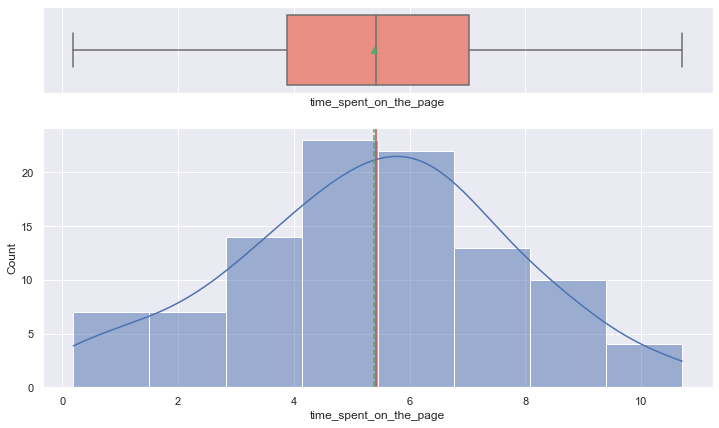

In [21]:
myhistogram_boxplot(c_data,'time_spent_on_the_page')

Observations:
- The mean and the median slightly overlap. Half of the visitors spend 5.41mn which is close to the  
  average time 5.37mn.
- The bell shaped curve depicts a normal distribution.

#### Categorical Variables

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=70, fontsize=15)
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(), )

    for p in ax.patches:
        
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
            

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(  label, (x, y),  ha="center",  va="center", size=12,xytext=(0, 5),textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

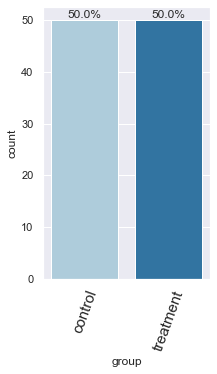

In [23]:
labeled_barplot(c_data,'group', perc=True)

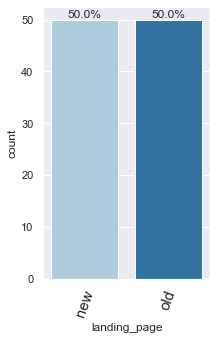

In [24]:
labeled_barplot(c_data,'landing_page', perc=True)

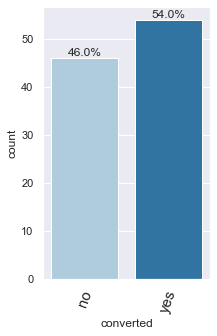

In [25]:
labeled_barplot(c_data,'converted', perc=True)

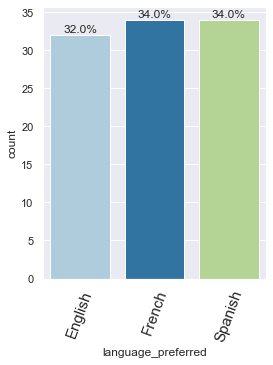

In [26]:
labeled_barplot(c_data,'language_preferred', perc=True)

Observations:
- The analysis of the dataset shows an equal size of visitors in the control and treatment group; 50 
  each. And as result, the same for the landing page. 
- More visitors converted (54) to the new page as opposed to 46 for the old page.
- French and Spanish top the list of most preferred languages and equally share the same number of 
  visitors. English remains the least preferred language.

### Bivariate Analysis

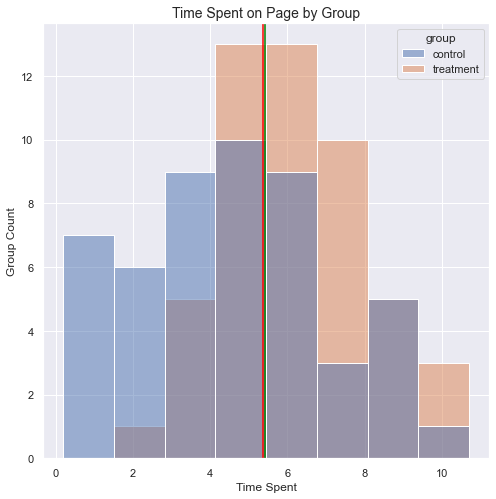

In [27]:
plt.figure(figsize=(8, 8))
plt.title('Time Spent on Page by Group', size=14)
sns.histplot(data = c_data, x = 'time_spent_on_the_page', hue = 'group')
plt.axvline(c_data['time_spent_on_the_page'].mean(),color='red')
plt.axvline(c_data['time_spent_on_the_page'].median(),color='green')
plt.xlabel('Time Spent')
plt.ylabel('Group Count')
plt.show()

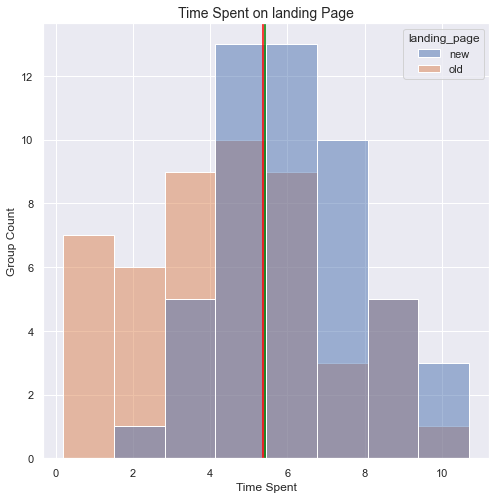

In [28]:
plt.figure(figsize=(8, 8))
plt.title('Time Spent on landing Page', size=14)
sns.histplot(data = c_data, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.axvline(c_data['time_spent_on_the_page'].mean(),color='red')
plt.axvline(c_data['time_spent_on_the_page'].median(),color='green')
plt.xlabel('Time Spent')
plt.ylabel('Group Count')    
plt.show()

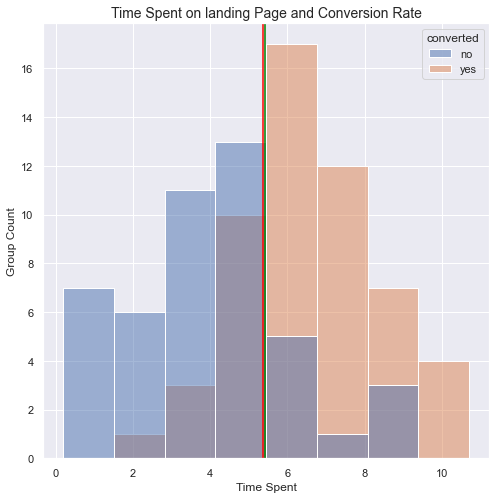

In [29]:
plt.figure(figsize=(8, 8))
plt.title('Time Spent on landing Page and Conversion Rate', size=14)
sns.histplot(data = c_data, x = 'time_spent_on_the_page', hue = 'converted')
plt.axvline(c_data['time_spent_on_the_page'].mean(),color='red')
plt.axvline(c_data['time_spent_on_the_page'].median(),color='green')
plt.xlabel('Time Spent')
plt.ylabel('Group Count')          
plt.show()

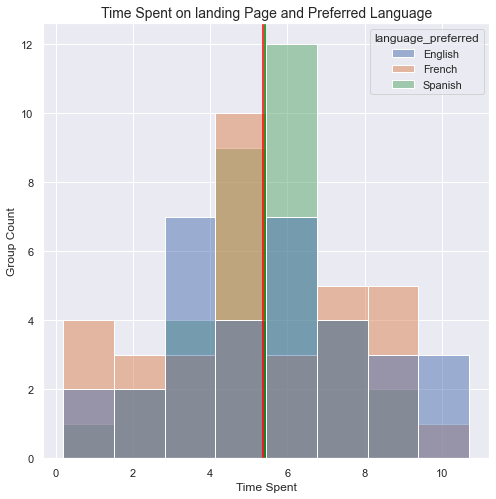

In [30]:
plt.figure(figsize=(8, 8))
plt.title('Time Spent on landing Page and Preferred Language', size=14)
sns.histplot(data = c_data, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.axvline(c_data['time_spent_on_the_page'].mean(),color='red')
plt.axvline(c_data['time_spent_on_the_page'].median(),color='green')
plt.xlabel('Time Spent')
plt.ylabel('Group Count')          
plt.show()

Observations:
- A visual inspection shows a high concentration of visitor's time around the mean (5.37mn) for the 
  treatment group.
- Visitors spend more time on the new page. Some in this group spent 10mn or more. Page visiting's 
  time for most in the treatment group ranges from 4mn to 8mn while those in the control group lies 
  betwen 0 to 4 mn. This seems to confirm our previous observations when we computed the mean time 
  for both groups.
- More visitors converted to the new page as previously stated.
- Spanish and French come first for the preferred languages.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

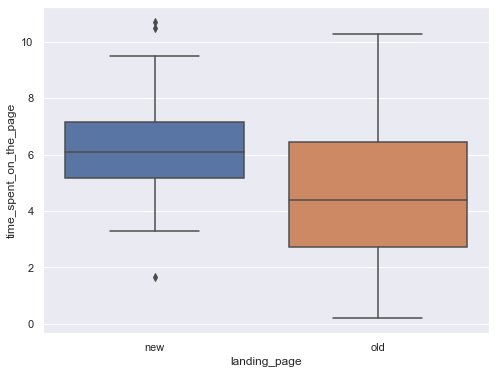

In [31]:
# Visual analysis of the time spent on the new page
# and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(data= c_data, x = 'landing_page', y = 'time_spent_on_the_page')
plt.show()

Visual Observations:

- The graphs show us that the data is normally distributed. No right or left skewness.

- The median time spent by visitors on the new page(treatment group) is just above 6mn while above   
  4.5mn for the old page.
  
- Minimum and maximum time point around 3.2mn and 9.7mn respectively. The time spent by visitors on  
  the new page hovers around the center values.

- 75% of the visitors navigate on the new page for more than 7mn with some outliers lying well above 
  10mn or below 2 mn. 
     
- 75 % of the visitors who navigate on the old page expend around 6.25mn with a maximum time above 
  10mn and a minimum time close to 0mn. A great variability can be noticed on the old page.
  
- 25% of visitors stay around 5 mn on the page and around 2.5 mn on the old one.
  
- Visitors seem to spend more time on the new landing page. But these observations need to be 
  confirmed with statistical evidence.

### Step 1: Define the null and alternate hypotheses


Let $\mu_1, \mu_2$ be the average time (mean) of the **Treatment group** that navigates on the new page and the average time of the **Control group** that navigates on the old page  respectively.

We will test the null hypothesis:

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

- Continuous data - The time spent on a page is measured on a continuous scale.
- Normally distributed populations - The samples are greater than 30. From the central limit theorem,   we can assume that we 
  have normal distributions.
- Independent populations - As we are taking random samples for two different groups, the two samples   are from two independent 
  populations.
- Unequal population standard deviation .
- Random sampling from the population - We are informed samples are randomly collected.
- Based on these assumptions, two **Independent Sample T-test for Equality of Means - Unequal Std 
  Dev** is appropriate.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha$ = 0.05.

### Step 4: Collect and prepare data

In [12]:
# Extracting the treatment group data as a dataframe
treatment_grp= c_data[c_data['group']== 'treatment']
# Figuring out the mean time for the treatment group which navigates on the new page.landing page variable could be used
# as well
round(treatment_grp['time_spent_on_the_page'].mean(),2)

6.22

In [13]:
# Calculating the standard deviaton on the time spent on the new page
round(treatment_grp['time_spent_on_the_page'].std(),2)

1.82

In [14]:
# Extracting the control group data as a dataframe
control_grp= c_data[c_data['group']== 'control']
# Figuring out the mean time for the control group which navigates on the old page
round(control_grp['time_spent_on_the_page'].mean(),2)

4.53

In [15]:
# Calculating the standard deviaton on the time spent on the old page
round(control_grp['time_spent_on_the_page'].std(),2)

2.58

In [16]:
# Again we bring the sample means and sample standard deviations for the two samples calculated in the EDA section
print('The mean time of the old page group is ' + str(round(c_data[c_data['group']== 'control']['time_spent_on_the_page'].mean(),2)))
print('The mean time of the new page group is ' + str(round(c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of the old page group is ' + str(round(c_data[c_data['group'] == 'control']['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of the new page group is ' + str(round(c_data[c_data['group']== 'treatment']['time_spent_on_the_page'].std(), 2)))

The mean time of the old page group is 4.53
The mean time of the new page group is 6.22
The standard deviation of the old page group is 2.58
The standard deviation of the new page group is 1.82


### Step 5: Calculate the p-value

In [17]:
# Importing the required library
from scipy.stats import ttest_ind

# Finding the p-value
test_stat, p_value = ttest_ind(c_data[c_data['group']== 'treatment']['time_spent_on_the_page'],c_data[c_data['group'] == 'control']['time_spent_on_the_page'] , equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

The P value is 0.00013 and is less than alpha (the level of significance) 0.05.

### Step 7:  Draw inference

- The p value is less  than alpha. Therefore, we reject the null hypothesis. As a result, with 
  a 95% confidence level,  we have enough statstical evidence to conclude that the mean time spent by visitors on the new page   is greater than the time spent on the old one.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
* 'group' and 'converted' are two categorical variables.
* We want to see if the proportion of users who visit the new landing page and get converted is higher than the proportion of 
  users who visited the old page.

**$H_0:$ The proportion of users who visited the new page and get converted is equal to the proportion of users who visited the 
  old page and get converted**

**$H_a:$ The proportion of users who visited the new page and get converted is greater than the proportion of users who 
  visited the old page and get converted**

### Step 2: Select Appropriate test

- Binomally distributed population. A visitor converts to a new page or not with a yes or no.
- Random sampling from the population. We are informed that the collected sample is a simple random sample.
- Approximate the binomial distribution to normal distribution leveraging the CLT for binary data.
- Check whether np and n(1-p) are greater than or equal to 10.  n and p refer to the sample size and sample proportion 
  respectively.

- Check whether np and n(1-p) are greater than or equal to 10.  n and p refer to the sample size and sample proportion 
  respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

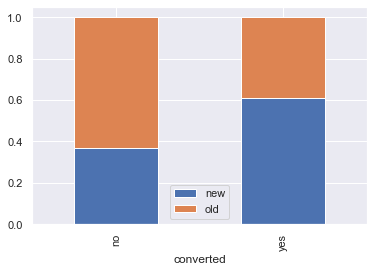

In [18]:
pd.crosstab(c_data['converted'],c_data['landing_page'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

In [30]:
# Determining the conversion number in the treatment group that navigates on the new page
conv_nbr_treatgrp= c_data[c_data['group']== 'treatment']['converted'].value_counts()['yes']
conv_nbr_treatgrp

33

In [20]:
# Just using the landing page variable to show the same result. Decide to go with the group variable
new_landing_page_grp= c_data[c_data['landing_page']== 'new']
conv_nbr_new_landing_page= new_landing_page_grp[new_landing_page_grp['converted']== 'yes'].value_counts().sum()
conv_nbr_new_landing_page

33

In [33]:
# Determining the conversion number in the control group that navigates on the old page
control_grp= c_data[c_data['group']== 'control']['converted'].value_counts()['yes']
conv_nbr_controlgrp

21

In [22]:
# Determining the size of the treatment group
treatment_grp= c_data[c_data['group']== 'treatment']
treatmen
treatment_grp_size

50

In [23]:
# Determining the size of the control group
control_grp= c_data[c_data['group']== 'control']
control_grp_size= control_grp.value_counts().sum()
control_grp_size

50

In [24]:
# Printing the proportions of converted to new page within each group
print(f' The proportions of converted visitors of two groups to new page are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of converted visitors of two groups to new page are 0.66, 0.42 respectively


### Step 5: Calculate the p-value

In [34]:
# Importing the required proportion library
from statsmodels.stats.proportion import proportions_ztest

# Finding the p-value using proportion_ztest
stat, p_value = proportions_ztest([conv_nbr_treatgrp,conv_nbr_controlgrp] , [treatment_grp_size,control_grp_size], alternative='larger')

# Printing the p-value
print('The p-value is '+ str(round(pval,3)))

The p-value is 0.008


### Step 6: Compare the p-value with $\alpha$

P value 0.016 is less than alpha 0.05.

### Step 7:  Draw inference

Since the p value is less than 0.05, we reject the null hypothesis. Enough statistical evidence propels us to affirm with a 95% confidence level that the conversion rate for the new page is greater than the one for the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion is independent of preferred language

$H_a:$ Conversion is NOT independent preferred language

### Step 2: Select Appropriate test

Chi-square test of independence of attributes can be leveraged to grasp insights on the relationship between the two categorical variables: conversion (yes or no) and the preferred languague (English, Spanish or French).

### Step 3: Decide the significance level

As given in the problem statement, we select α= 0.05.

### Step 4: Collect and prepare data

In [45]:
# Getting the unique values for converted
conversion_cnt = c_data['converted'].value_counts()
conversion_cnt

yes    54
no     46
Name: converted, dtype: int64

In [46]:
# Getting the unique values for the preferred languages
pref_lang_cnt = c_data['language_preferred'].value_counts()
pref_lang_cnt

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

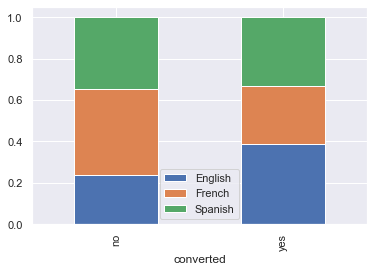

In [47]:
# Creating a stacked bar plot to compare the distributions of both categorical variables
pd.crosstab(c_data['converted'],c_data['language_preferred'],normalize='index').plot(kind='bar',stacked =True)
plt.legend()
plt.show()

Observation:
- Even though English is the least preferred language(32%) in the distribution among visitors, a   
  visual inspection of the above   graph shows us that the proportion of English speaking visitors 
  who converted seems higher.

In [48]:
# Creating the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(c_data['converted'],c_data['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [49]:
# Importing the Chi-Square library
from scipy.stats import chi2_contingency  
# Using chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# Printing the p-value
print('The p-value is', round(pval,3))

The p-value is 0.213


### Step 6: Compare the p-value with $\alpha$

The p value (0.213) is greater than alpha (0.05). We fail to reject the null hypothesis.

### Step 7:  Draw inference

The conversion rate is independent of the preferred spoken language . Whether a visitor speaks English, French or Spanish is not a factor triggering a conversion from the old page to the new one.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Step 1: Define the null and alternate hypotheses

    
Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for English, French, and Spanish visitors respectively.

We will test the null hypothesis against the alternative hypothesis:

Null hypothesis:

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative hypothesis:

>$H_a: $ At least one preferred language visitor mean is different from the rest.

### Step 2: Select Appropriate test

In [50]:
c_data['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


Text(0.5, 1.0, 'Time Spent per Preferred Language')

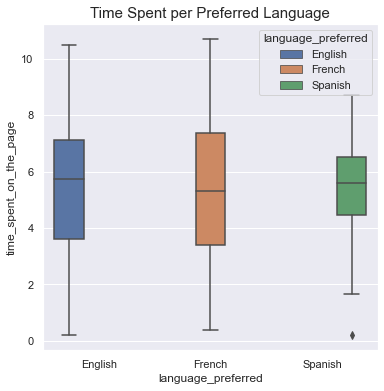

In [51]:
# Plotting a graph to see 
# mean of time spent at different levels of a preferred language
print(c_data.groupby("language_preferred")["time_spent_on_the_page"].mean()

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = c_data, hue = 'language_preferred')
a.set_title("Time Spent per Preferred Language", fontsize=15)

Observation:
The average times spent on the new page per preferred language seem equal. All visitors, regardless  of the language, consume 5mn.

### Step 3: Decide the significance level

As given in the problem statement, we select  𝛼  = 0.05.

### Step 4: Collect and prepare data

Checking for Normality and Equality of variance assumptions. 

* Shapiro-Wilk’s test will be applied to the response variable for testing normality.

* Levene test will be applied to the response variable for testing equality of variance. 

Let's set up the null and alternative hypothesis for the Shapiro-Wilks's test respectively.

We will test the null hypothesis against the alternative hypothesis:

>$H_0$:  Time spent on page follows a normal distribution.

>$H_a$   Time spent does not follow a normal distribution.

##### Shapiro's Test

In [52]:
# Testing the first assumption : Normality
# Importing the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(c_data['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


Observation:

The p-value (0.54) is greater than alpha(0.05). Hence, we fail to reject the null hypothesis. As a result, the response follows a normal distribution.

##### Levene's Test

Setting up the null and alternative hypothesis:

>$H_0$: All the population variances are equal.

>$H_a$: At least one variance is different from the rest.

In [53]:
# Testing the second assumption : Homogeneity of Variance
# Importing the required function
from scipy.stats import levene

statistic, p_value = levene(c_data['time_spent_on_the_page'][c_data['language_preferred']=="English"], 
                                   c_data['time_spent_on_the_page'][c_data['language_preferred']=="French"], 
                                   c_data['time_spent_on_the_page'][c_data['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


Observation:
The p value (0.065) is greater than alpha (0.05).Hence, we fail to reject the null hypothesis of equal variances or homogeneity of variances. In other words, the variances are equal.

##### One-way ANOVA Test

Upon fulfilling the normality and equality of variances assumptions, we can examine the oneway Anova test assumptions:

- The populations are normally distributed. The Shapiro-Wilk’s test validates it.
- Samples are independent. Sample are randomly collected.
- Population variances are equal. The levene's test confirms it.

### Step 5: Calculate the p-value

In [54]:
# Importing the required function
from scipy.stats import f_oneway

# Performing one-way anova test
test_stat, p_value = f_oneway(c_data['time_spent_on_the_page'][c_data['language_preferred']=="English"], 
                                   c_data['time_spent_on_the_page'][c_data['language_preferred']=="French"], 
                                   c_data['time_spent_on_the_page'][c_data['language_preferred']=="Spanish"])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Step 6: Compare the p-value with $\alpha$

The p value (0.86) is greater than alpha. Therefore, we fail to reject the null hypothesis.

### Step 7:  Draw inference

With a 95% confidence level, we can conclude that the average time spent by visitors, regardless of the preferred language, is the same.

## Conclusion and Business Recommendations

- This study confirms that an EDA is not enough to draw conclusions and make business decisions. 

- A first exploratory data analysis may lead to conclude that the business should target Spanish and   French speaking new customers as they form the majority of visitors.Two thirds of the sample 
  distribution speak either Spanish or French (68%), and one third speaks Engish (32%). 
  
- A visual graphical inspection points out that English speaking visitors's conversion rate seems 
  higher than for other speaking languages.
  
- The analysis also shows that visitors spend more time on the new page than on the old one.

- More visitors converted slightly to the new page than the old one. 54 out 100. 

- **A deep statistical analysis reveals meaningful findings**

- Conversion to the new page is independent of a specific spoken language.
  
- The deep analysis showcases that the average time spent visiting the new page is the same for all 
  visitors.
  
- The conversion rate is higher for the new page than for the old one. 
  
  As a result, language is not a hurdle for introducing the new feature and attracting new 
  subscribers. The company should pursue the rollout as the study reveals that the conversion rate to 
  the new page is higher than for the old page. 
